# Um conjunto fictícios cachorros-gatos

Este notebook foi feito com o objetivo de demonstrar alguns conceitos simples de aprendizagem de máquina, tendo como base um conjunto com dados fictícios de cachorros e gatos.

## Criando a base

Além do rótulo que indica se o exemplo é cachorro ou gato, a base será composta por 3 variáveis explicativas:

  1. Comprimento: comprimento do animal em cm
  2. Altura: altura do animal em cm
  3. Peso: peso do animal em kg
  

In [116]:
import pandas as pd
import numpy as np
from scipy.stats import beta

import matplotlib.pyplot as plt

In [117]:
np.random.seed(42)

n_dogs, n_cats = 500, 500
n = n_dogs + n_cats  # quantidade de exemplos

cov_dogs = 25
cov_cats = 2

dogs = np.random.multivariate_normal(
    [100, 44, 18],
    [
        [400, cov_dogs, cov_dogs],
        [cov_dogs, 225, cov_dogs],
        [cov_dogs, cov_dogs, 25]
    ],
    size=n_dogs
)

cats = np.random.multivariate_normal(
    [76, 24, 6],
    [
        [100, cov_cats, cov_cats],
        [cov_cats, 4, cov_cats],
        [cov_cats, cov_cats, 3]
    ],
    size=n_cats
)

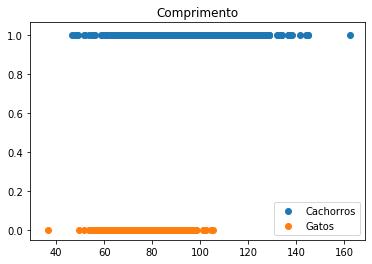

In [118]:
plt.scatter(dogs[:, 0], np.ones(n_dogs), label='Cachorros')
plt.scatter(cats[:, 0], np.zeros(n_cats), label='Gatos')
plt.title('Comprimento')
plt.legend()

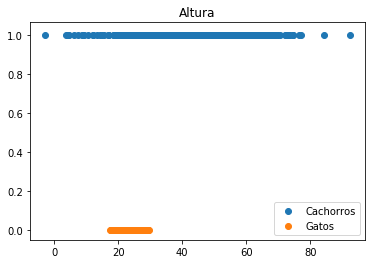

In [119]:
plt.scatter(dogs[:, 1], np.ones(n_dogs), label='Cachorros')
plt.scatter(cats[:, 1], np.zeros(n_cats), label='Gatos')
plt.title('Altura')
plt.legend()

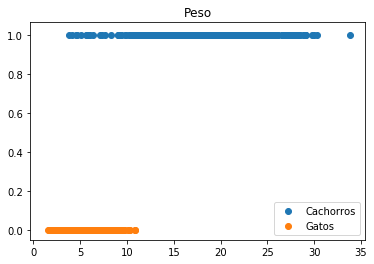

In [120]:
plt.scatter(dogs[:, 2], np.ones(n_dogs), label='Cachorros')
plt.scatter(cats[:, 2], np.zeros(n_cats), label='Gatos')
plt.title('Peso')
plt.legend()

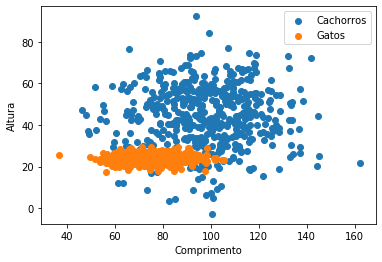

In [121]:
plt.scatter(dogs[:, 0], dogs[:, 1], label='Cachorros')
plt.scatter(cats[:, 0], cats[:, 1], label='Gatos')
plt.xlabel('Comprimento')
plt.ylabel('Altura')
plt.legend()

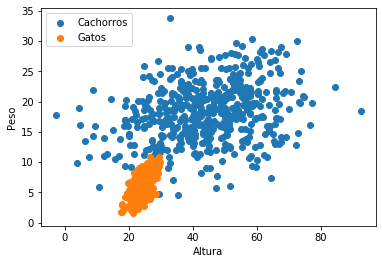

In [122]:
plt.scatter(dogs[:, 1], dogs[:, 2], label='Cachorros')
plt.scatter(cats[:, 1], cats[:, 2], label='Gatos')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend()

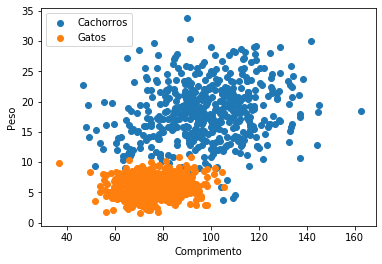

In [123]:
plt.scatter(dogs[:, 0], dogs[:, 2], label='Cachorros')
plt.scatter(cats[:, 0], cats[:, 2], label='Gatos')
plt.xlabel('Comprimento')
plt.ylabel('Peso')
plt.legend()

In [124]:
data = pd.DataFrame(
    np.vstack([dogs, cats]),
    columns=['Comprimento', 'Altura', 'Peso']
)

data['Classe'] = ['Cachorro'] * n_dogs + ['Gato'] * n_cats
data.to_csv('dogs-cats.csv')
data

,Comprimento,Altura,Peso,Classe
0,89.643783,44.226692,20.390769,Cachorro
1,69.266825,43.058878,15.026365,Cachorro
2,70.521718,28.295195,12.319968,Cachorro
3,88.276124,49.448006,15.809473,Cachorro
4,91.235919,72.298752,12.843536,Cachorro
...,...,...,...,...
995,85.591307,24.362087,6.466469,Gato
996,87.462780,18.668927,4.212407,Gato
997,69.984876,23.895008,5.569046,Gato
998,85.523231,23.869576,6.333091,Gato


## Distinguindo cães e gatos manualmente

Agora, nós iremos escolher visualmente a variável que melhor separa as duas classes. Pelos gráficos acima, a variável _Peso_ parece oferecer a melhor separação. Se a escolhermos, podemos dizer que qualquer elemento acima do maior _Peso_ exibido por um gato, é necessariamente um cachorro.

In [125]:
cut_point = data[data['Classe'] == 'Gato']['Peso'].max()
cut_point

10.83123906545092

In [126]:
data_weight_cut = data[data['Peso'] <= cut_point]
data_weight_cut

,Comprimento,Altura,Peso,Classe
24,105.007535,22.471937,3.804684,Cachorro
36,95.216541,45.329042,9.079931,Cachorro
48,96.965051,32.383921,10.815427,Cachorro
52,64.342056,32.137574,9.093969,Cachorro
73,104.200734,10.710500,5.851403,Cachorro
...,...,...,...,...
995,85.591307,24.362087,6.466469,Gato
996,87.462780,18.668927,4.212407,Gato
997,69.984876,23.895008,5.569046,Gato
998,85.523231,23.869576,6.333091,Gato


In [127]:
data_weight_cut['Classe'].value_counts()

Gato        500
Cachorro     29
Name: Classe, dtype: int64

Ao separar os dados usando o valor máximo de _Peso_ exibido por gatos, temos que todos os elementos acima do ponto de corte são cachorros, enquanto que abaixo do ponto de corte, temos 500 gatos e 29 cães. Ou seja, não podemos dizer com certeza que exemplos com _Peso_ menor que o ponto de corte são gatos. 

Ainda temos 2 variáveis à disposição para tentar diferenciar os 538 exemplos restantes. Repetindo o passo que tomamos anteriormente, vamos usar os gráficos para escolher a variável que melhor diferencia as classes.

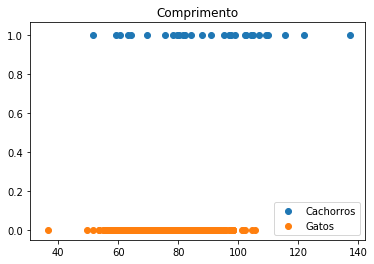

In [128]:
dogs_weight_cut = data_weight_cut[data_weight_cut['Classe'] == 'Cachorro']
cats_weight_cut = data_weight_cut[data_weight_cut['Classe'] == 'Gato']
plt.scatter(dogs_weight_cut['Comprimento'], np.ones(len(dogs_weight_cut)), label='Cachorros')
plt.scatter(cats_weight_cut['Comprimento'], np.zeros(len(cats_weight_cut)), label='Gatos')
plt.title('Comprimento')
plt.legend()

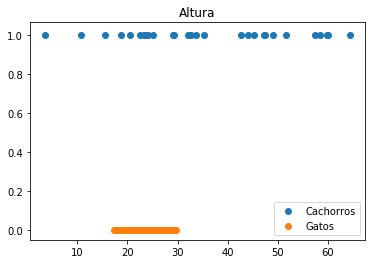

In [129]:
plt.scatter(dogs_weight_cut['Altura'], np.ones(len(dogs_weight_cut)), label='Cachorros')
plt.scatter(cats_weight_cut['Altura'], np.zeros(len(cats_weight_cut)), label='Gatos')
plt.title('Altura')
plt.legend()

A melhor variável parece ser a _Altura_ e o valor máximo de _Altura_ exibido pelos gatos parece ser um bom ponto de corte.

In [130]:
cut_point_height = data_weight_cut[data_weight_cut['Classe'] == 'Gato']['Altura'].max()
cut_point_height

29.646003685790433

In [131]:
data_height_cut = data_weight_cut[data_weight_cut['Altura'] <= cut_point_height]
data_height_cut

,Comprimento,Altura,Peso,Classe
24,105.007535,22.471937,3.804684,Cachorro
73,104.200734,10.710500,5.851403,Cachorro
78,59.404497,29.395356,4.668401,Cachorro
84,60.623182,23.339888,6.359898,Cachorro
145,102.645578,20.562861,9.128637,Cachorro
...,...,...,...,...
995,85.591307,24.362087,6.466469,Gato
996,87.462780,18.668927,4.212407,Gato
997,69.984876,23.895008,5.569046,Gato
998,85.523231,23.869576,6.333091,Gato


In [132]:
data_height_cut['Classe'].value_counts()

Gato        500
Cachorro     12
Name: Classe, dtype: int64

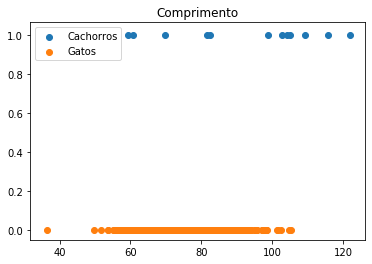

In [133]:
dogs_height_cut = data_height_cut[data_height_cut['Classe'] == 'Cachorro']
cats_height_cut = data_height_cut[data_height_cut['Classe'] == 'Gato']
plt.scatter(dogs_height_cut['Comprimento'], np.ones(len(dogs_height_cut)), label='Cachorros')
plt.scatter(cats_height_cut['Comprimento'], np.zeros(len(cats_height_cut)), label='Gatos')
plt.title('Comprimento')
plt.legend()

In [136]:
cut_point_length = data_height_cut[data_height_cut['Classe'] == 'Gato']['Comprimento'].max()
cut_point_length

105.44789872152683

In [139]:
data_length_cut_below = data_height_cut[data_height_cut['Comprimento'] <= cut_point_length]
data_length_cut_below['Classe'].value_counts()

Gato        500
Cachorro      9
Name: Classe, dtype: int64

In [138]:
data_length_cut_above = data_height_cut[data_height_cut['Comprimento'] > cut_point_length]
data_length_cut_above['Classe'].value_counts()

Cachorro    3
Name: Classe, dtype: int64

O ponto de corte que incluiria mais cachorros, ainda resultaria em mais gatos. Portanto, não vale a pena fazer esse último corte e podemos desconsiderar a variável _Comprimento_.

In [153]:
from sklearn.tree import DecisionTreeClassifier

X = data[['Comprimento', 'Altura', 'Peso']]
y = data['Classe']

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(643.8461538461538, 951.3000000000001, 'Peso <= 10.249\nentropy = 0.5\nsamples = 1000\nvalue = [500, 500]\nclass = Cachorro'),
 Text(343.38461538461536, 679.5, 'Altura <= 28.99\nentropy = 0.088\nsamples = 521\nvalue = [24, 497]\nclass = Gato'),
 Text(171.69230769230768, 407.70000000000005, 'Comprimento <= 102.501\nentropy = 0.035\nsamples = 504\nvalue = [9, 495]\nclass = Gato'),
 Text(85.84615384615384, 135.89999999999998, 'entropy = 0.016\nsamples = 497\nvalue = [4, 493]\nclass = Gato'),
 Text(257.53846153846155, 135.89999999999998, 'entropy = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = Cachorro'),
 Text(515.0769230769231, 407.70000000000005, 'Peso <= 9.939\nentropy = 0.208\nsamples = 17\nvalue = [15, 2]\nclass = Cachorro'),
 Text(429.23076923076917, 135.89999999999998, 'entropy = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = Cachorro'),
 Text(600.9230769230769, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Gato'),
 Text(944.3076923076923, 679.5, 'Peso 

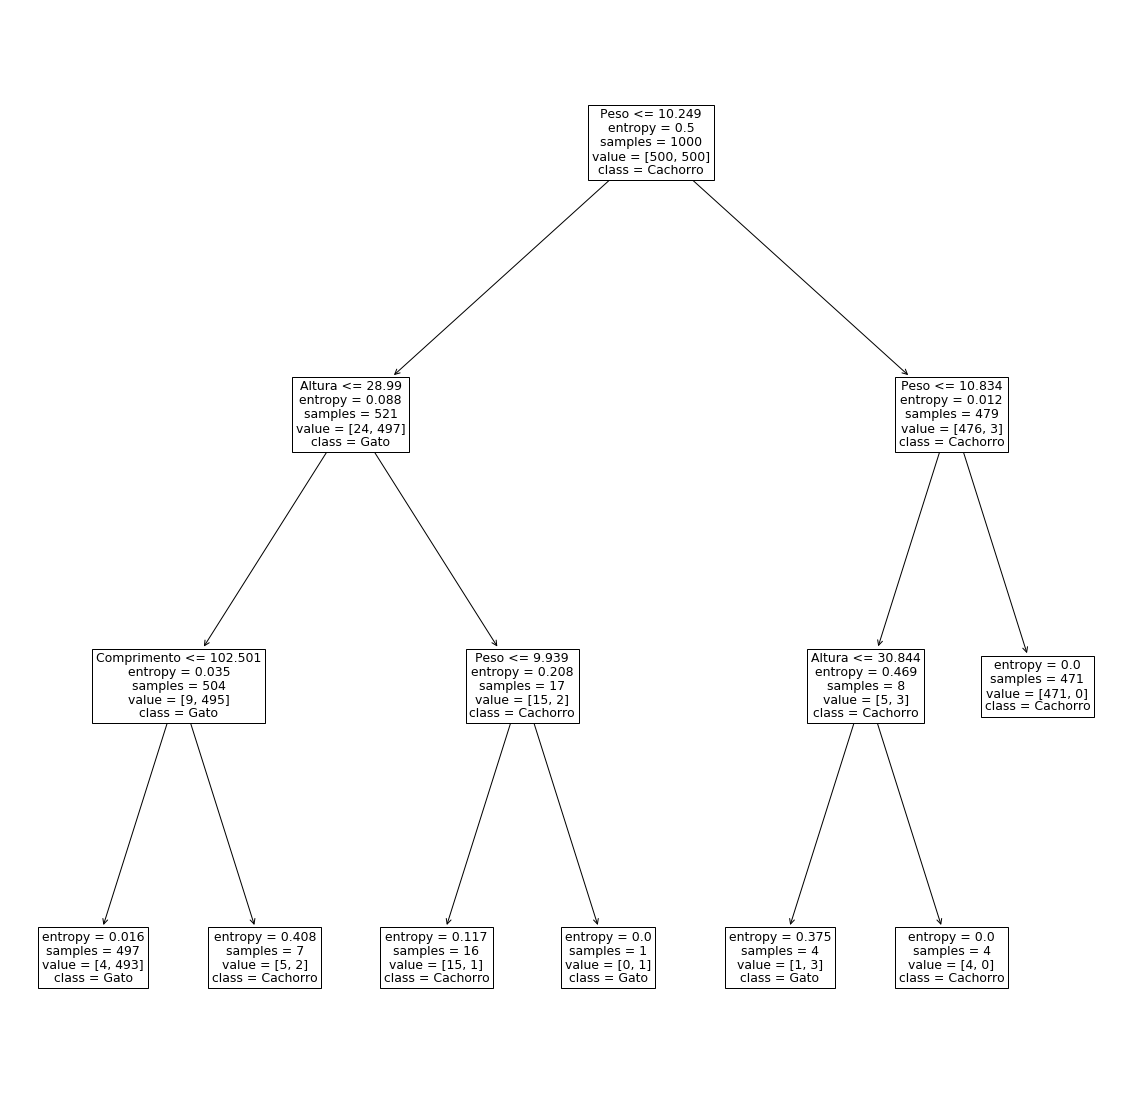

In [155]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(dt, class_names=['Cachorro', 'Gato'], feature_names=['Comprimento', 'Altura', 'Peso'])

In [156]:
dt.decision_path([[110, 46, 10.7]])

<1x13 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [157]:
dt.feature_importances_

array([0.01417324, 0.05522664, 0.93060012])

In [158]:
predictions = dt.predict(X)

predictions

array(['Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro',
       'Cachorro', 'Cachorro', 'Cachorro', 'Cachorro', 'Cachor

## k-vizinhos mais próximos

In [161]:
from sklearn.neighbors import KNeighborsClassifier

X = data[['Altura', 'Peso']]
y = data['Classe']

knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Regressão

Regressão é usado quando queremos estimar um valor numérico. A ideia é encontrar uma função que receba valores de uma ou mais variáveis e dê como resultado valores de uma ou mais variáveis desejadas.

Text(0, 0.5, 'Peso')

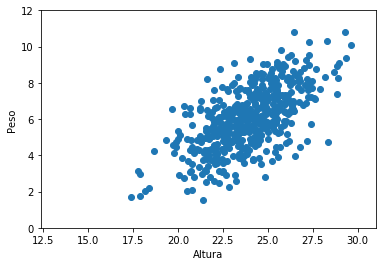

In [177]:
X, Y = cats[:, 1].reshape(-1, 1), cats[:, 2].reshape(-1, 1)
plt.scatter(X, Y)
plt.xlim([12.3885887154, 31])
plt.ylim([0, 12])
plt.xlabel('Altura')
plt.ylabel('Peso')

In [193]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
print(lr.coef_, lr.intercept_)

[[0.5199511]] [-6.44146033]


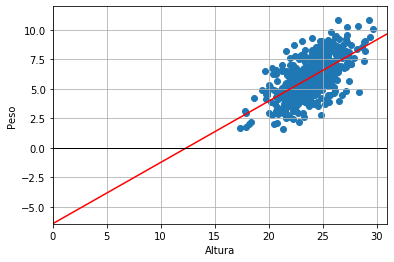

In [207]:
plt.scatter(X, Y)
plt.plot([0, 31], [lr.intercept_[0], 31 * lr.coef_[0][0] + lr.intercept_[0]], c='r')
plt.plot([0, 31], [0, 0], c='k', linewidth=1)
plt.xlim([0, 31])
plt.ylim([lr.intercept_[0], 12])
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.grid()

In [209]:
X = cats[:, [0, 1]]
Y = cats[:, 2].reshape(-1, 1)

lr = LinearRegression()
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
print(lr.coef_, lr.intercept_)

[[0.01400613 0.51792567]] [-7.45807548]


In [211]:
akc_data = pd.read_csv(
    'https://raw.githubusercontent.com/tmfilho/akcdata/master/data/akc-data-latest.csv', 
    index_col=0
)

akc_data

,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wirehaired Vizsla,WVs are close relatives of Vizslas but a disti...,"Gentle, Loyal, Trainable",167,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
Working Kelpie,The overall appearance of the Working Kelpie i...,"Alert, Eager, Intelligent",NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.6,Alert/Responsive
Xoloitzcuintli,The Xoloitzcuintli (show-low-eats-queen-tlee) ...,"Loyal, Alert, Calm",140,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,Occasional Bath/Brush,0.2,Infrequent,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
Yakutian Laika,For centuries the Yakutian Laika was an irrepl...,"Affectionate, Intelligent, Active",NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,0.2,May be Stubborn,0.4,Reserved with Strangers


In [213]:
akc_data = akc_data.dropna()

In [221]:
X = (akc_data['min_height'] + akc_data['max_height']) / 2  
X = X.values.reshape(-1, 1)
Y = (akc_data['min_weight'] + akc_data['max_weight']) / 2
Y = Y.values.reshape(-1, 1)

(0, 90)

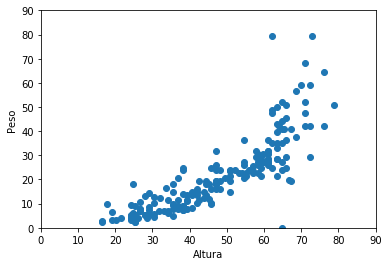

In [224]:
plt.scatter(X, Y)
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.xlim([0, 90])
plt.ylim([0, 90])

In [223]:
lr_akc = LinearRegression().fit(X, Y)
print(lr_akc.coef_, lr_akc.intercept_)

[[0.81284305]] [-16.77126286]


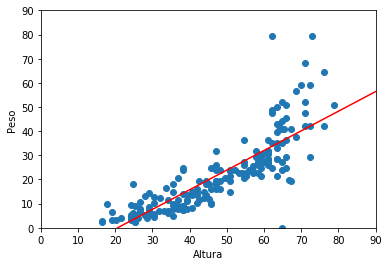

In [225]:
plt.scatter(X, Y)
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.xlim([0, 90])
plt.ylim([0, 90])

lims = [[16.77126286 / 0.81284305], [90]]

plt.plot(lims, lr_akc.predict(lims), c='r')

In [244]:
class ExponentialRegression:
    def fit(self, X, y):
        self.lr = LinearRegression()
        self.lr.fit(X, np.log1p(y))
        return self
    def predict(self, X):
        return np.expm1(self.lr.predict(X))

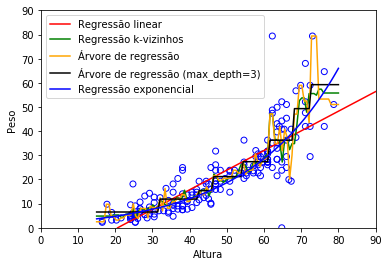

In [245]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

knr = KNeighborsRegressor().fit(X, Y)
dtr = DecisionTreeRegressor().fit(X, Y)
dtr_max = DecisionTreeRegressor(max_depth=3).fit(X, Y)
expr = ExponentialRegression().fit(X, Y)


plt.scatter(X, Y, facecolors='None', edgecolors='b')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.xlim([0, 90])
plt.ylim([0, 90])

lims = [[16.77126286 / 0.81284305], [90]]
x_ = np.linspace(15, 80, 100).reshape(-1, 1)

plt.plot(lims, lr_akc.predict(lims), c='r', label='Regressão linear')
plt.plot(x_, knr.predict(x_), c='g', label='Regressão k-vizinhos')
plt.plot(x_, dtr.predict(x_), c='orange', label='Árvore de regressão')
plt.plot(x_, dtr_max.predict(x_), c='k', label='Árvore de regressão (max_depth=3)')
plt.plot(x_, expr.predict(x_), c='b', label='Regressão exponencial')
plt.legend()

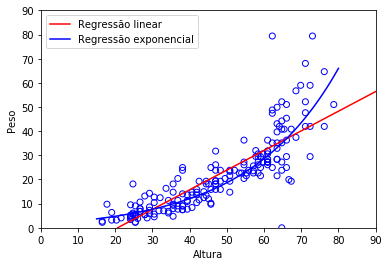

In [246]:
plt.scatter(X, Y, facecolors='None', edgecolors='b')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.xlim([0, 90])
plt.ylim([0, 90])

lims = [[16.77126286 / 0.81284305], [90]]
x_ = np.linspace(15, 80, 100).reshape(-1, 1)

plt.plot(lims, lr_akc.predict(lims), c='r', label='Regressão linear')
# plt.plot(x_, knr.predict(x_), c='g', label='Regressão k-vizinhos')
# plt.plot(x_, dtr.predict(x_), c='orange', label='Árvore de regressão')
# plt.plot(x_, dtr_max.predict(x_), c='k', label='Árvore de regressão (max_depth=3)')
plt.plot(x_, expr.predict(x_), c='b', label='Regressão exponencial')
plt.legend()

## Usando regressão para fazer classificação

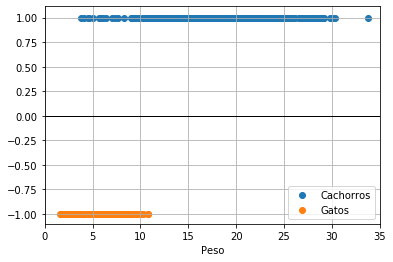

In [267]:
plt.scatter(dogs[:, 2], np.ones(n_dogs), label='Cachorros')
plt.scatter(cats[:, 2], np.ones(n_cats) * -1, label='Gatos')
plt.plot([0, 35], [0, 0], c='k', linewidth=1)
plt.xlim([0, 35])
plt.xlabel('Peso')
plt.legend()
plt.grid()

In [268]:
X_class = np.append(dogs[:, 2], cats[:, 2]).reshape(-1, 1)
Y_class = np.vstack([np.ones((n_dogs, 1)), np.ones((n_dogs, 1)) * -1])

lr_class = LinearRegression().fit(X_class, Y_class)

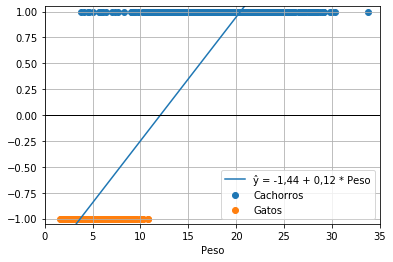

In [271]:
plt.scatter(dogs[:, 2], np.ones(n_dogs), label='Cachorros')
plt.scatter(cats[:, 2], np.ones(n_cats) * -1, label='Gatos')
plt.plot([[0], [35]], lr_class.predict([[0], [35]]), label='ŷ = -1,44 + 0,12 * Peso')
plt.plot([0, 35], [0, 0], c='k', linewidth=1)
plt.xlim([0, 35])
plt.ylim([-1.05, 1.05])
plt.xlabel('Peso')
plt.legend()
plt.grid()

In [270]:
print(lr_class.coef_, lr_class.intercept_)

[[0.11950446]] [-1.44325517]


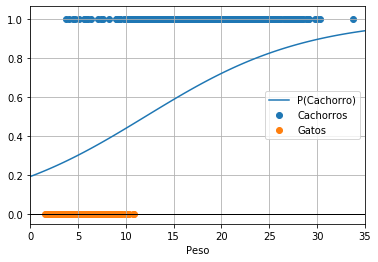

In [277]:
plt.scatter(dogs[:, 2], np.ones(n_dogs), label='Cachorros')
plt.scatter(cats[:, 2], np.zeros(n_cats), label='Gatos')

lims = np.linspace(0, 35, 100).reshape(-1, 1)

plt.plot(lims, 1 / (1 + np.exp(-lr_class.predict(lims))), label='P(Cachorro)')
plt.plot([0, 35], [0, 0], c='k', linewidth=1)
plt.xlim([0, 35])
plt.xlabel('Peso')
plt.legend()
plt.grid()